# Import the libraries

In [2]:
#These are all the necessary libraries that we imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from IPython.display import display, HTML
from sklearn.metrics import classification_report, precision_recall_curve, f1_score, average_precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset

In [4]:
#This is the step where we load the dataset
data = pd.read_csv('creditcard.csv')  
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Data Description

In [6]:
#Showing the shape of data rows x columns
data.shape

(284807, 31)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#Here, data is described like mean, percentiles, min, max
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
print("Data Shape:", data.shape)
print("Class Distribution:\n", data['Class'].value_counts())

Data Shape: (284807, 31)
Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


# Exploratory Data Analysis & Hypothesis Generation

In [11]:
#We defined the PCA-transformed feature columns (V1 to V28)
pca_features = [f'V{i}' for i in range(1, 29)]
#Then exploring descriptive statistics by class
grouped_stats = data.groupby('Class')[pca_features].agg(['mean', 'std','var'])
print("\nDescriptive stats for PCA features grouped by Class:")
print(grouped_stats)


Descriptive stats for PCA features grouped by Class:
             V1                             V2                             V3  \
           mean       std        var      mean       std        var      mean   
Class                                                                           
0      0.008258  1.929814   3.724182 -0.006271  1.636146   2.676974  0.012171   
1     -4.771948  6.783687  46.018406  3.623778  4.291216  18.414532 -7.033281   

                                  V4  ...       V25       V26            \
            std        var      mean  ...       var      mean       std   
Class                                 ...                                 
0      1.459429   2.129933 -0.007860  ...  0.271101 -0.000089  0.482241   
1      7.110937  50.565429  4.542029  ...  0.635535  0.051648  0.471679   

                      V27                           V28                      
            var      mean       std       var      mean       std       var  
Class   

In [12]:
#We will create HTML table with 4 columns
html = ["<table style='width:100%; border-collapse: collapse;'>"]
html.append("<tr><th style='border: 1px solid #ddd; padding: 8px;'>Feature</th>"
            "<th style='border: 1px solid #ddd; padding: 8px;'>Mean</th>"
            "<th style='border: 1px solid #ddd; padding: 8px;'>Std</th>"
            "<th style='border: 1px solid #ddd; padding: 8px;'>Var</th></tr>")

#And then, add data rows in 4-column groups
for i in range(0, 28, 4):
    for j in range(4):
        if i+j < 28:
            feat = f'V{i+j+1}'
            stats = grouped_stats[feat].values[0]  # Change index for different class
            html.append(f"<tr><td style='border: 1px solid #ddd; padding: 8px;'><b>{feat}</b></td>"
                       f"<td style='border: 1px solid #ddd; padding: 8px;'>{stats[0]:.4f}</td>"
                       f"<td style='border: 1px solid #ddd; padding: 8px;'>{stats[1]:.4f}</td>"
                       f"<td style='border: 1px solid #ddd; padding: 8px;'>{stats[2]:.4f}</td></tr>")
    
    #Now, Add spacing between groups
    if i+4 < 28:
        html.append("<tr style='height: 10px;'><td colspan='4'></td></tr>")

html.append("</table>")
display(HTML(''.join(html)))

In [13]:
#We Perform t-tests for each PCA feature between fraudulent (Class=1) and legitimate (Class=0)
ttest_results = {}
for feature in pca_features:
    fraud_values = data[data['Class'] == 1][feature]
    legit_values = data[data['Class'] == 0][feature]
    t_stat, p_val = ttest_ind(fraud_values, legit_values, equal_var=False)
    ttest_results[feature] = {'t_stat': t_stat, 'p_value': p_val}
ttest_df = pd.DataFrame(ttest_results).T
print("\nT-test results for each PCA feature:")
print(ttest_df)


T-test results for each PCA feature:
        t_stat        p_value
V1  -15.629065   5.491643e-45
V2   18.761177   1.288580e-59
V3  -21.976004   4.786081e-75
V4   35.116449  4.587317e-136
V5  -13.032119   1.497028e-33
V6  -16.706743   5.880378e-50
V7  -17.168755   4.292231e-52
V8    1.865139   6.275812e-02
V9  -22.928481   1.193505e-79
V10 -25.755260   3.382884e-93
V11  31.519223  4.577212e-120
V12 -29.880026  1.481317e-112
V13  -2.197912   2.842017e-02
V14 -36.201024  1.040151e-140
V15  -1.965369   4.993336e-02
V16 -23.798892   7.905326e-84
V17 -21.247727   1.558094e-71
V18 -17.213506   2.639223e-52
V19   9.819276   6.707057e-21
V20   6.141529   1.687689e-09
V21   4.097655   4.882130e-05
V22   0.208815   8.346792e-01
V23  -0.566901   5.710402e-01
V24  -4.525328   7.565213e-06
V25   1.154825   2.487229e-01
V26   2.430799   1.542128e-02
V27   2.752685   6.129684e-03
V28   3.071049   2.251207e-03


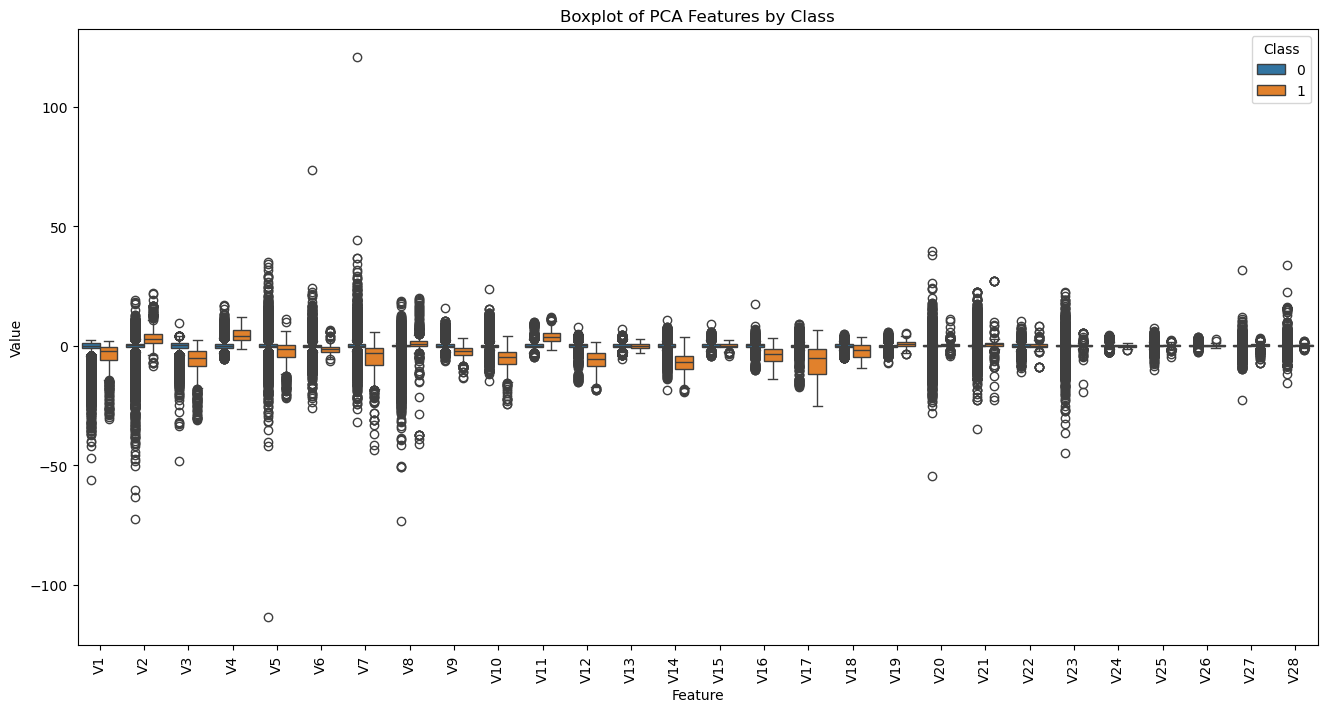

In [14]:
# Over here, we visualize PCA feature distributions using boxplots
plt.figure(figsize=(16, 8))
long_df = pd.melt(data, id_vars=['Class'], value_vars=pca_features, var_name='Feature', value_name='Value')
sns.boxplot(x='Feature', y='Value', hue='Class', data=long_df)
plt.xticks(rotation=90)
plt.title("Boxplot of PCA Features by Class")
plt.show()

# Apply Singular Value Decomposition (SVD)

In [16]:
#Using PCA-transformed features, we Create the matrix X
X = data[pca_features].values

#Computing full SVD: X = U * Sigma * Vtx
U, s, Vt = np.linalg.svd(X, full_matrices=False)
print("\nTop 10 Singular Values:", s[:10])

#We need to Choose a value for k (number of singular values/components to keep)
k = 10  #Performance based tuning(data-driven selection)
s_k = np.diag(s[:k])
U_k = U[:, :k]
Vt_k = Vt[:k, :]

#Using only the top k singular values, we reconstruct the data 
X_approx = np.dot(U_k, np.dot(s_k, Vt_k))



Top 10 Singular Values: [1045.30146748  881.25745611  809.18312015  755.60967468  736.59928904
  710.99602218  660.20244238  637.39292206  586.30938649  581.08883238]


# Compute Reconstruction Error

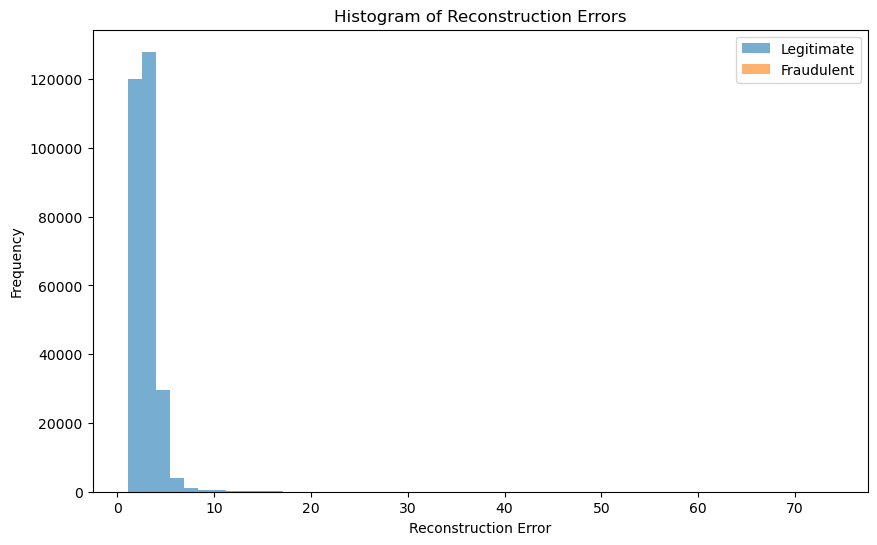

In [18]:
#We Calculate the L2 norm (Euclidean distance) between original and reconstructed data for each transaction
reconstruction_error = np.linalg.norm(X - X_approx, axis=1)
data['reconstruction_error'] = reconstruction_error

#We are plotting histogram for the reconstruction error distribution
plt.figure(figsize=(10, 6))
plt.hist(data[data['Class'] == 0]['reconstruction_error'], bins=50, alpha=0.6, label='Legitimate')
plt.hist(data[data['Class'] == 1]['reconstruction_error'], bins=50, alpha=0.6, label='Fraudulent')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Reconstruction Errors')
plt.legend()
plt.show()

# Anomaly Detection: Threshold Selection


Anomaly detection threshold (95th percentile): 4.716992702983752

Classification Report for SVD-based Anomaly Detection:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    284315
           1       0.03      0.88      0.06       492

    accuracy                           0.95    284807
   macro avg       0.51      0.91      0.52    284807
weighted avg       1.00      0.95      0.97    284807



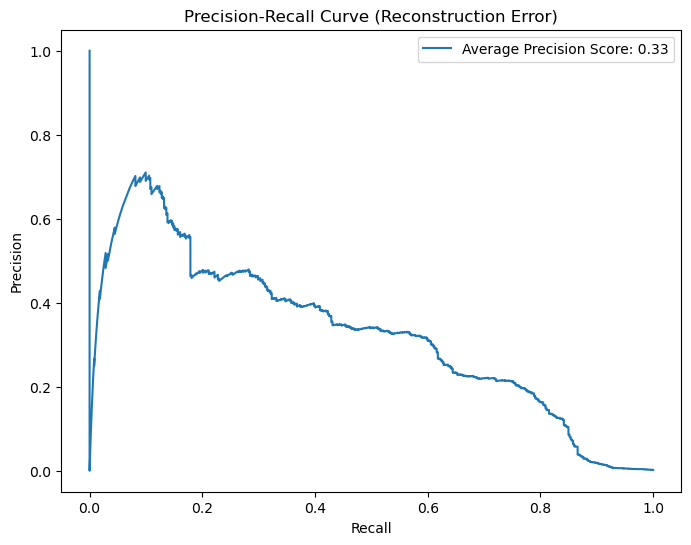

In [20]:
#For instance, decide on the 95th percentile of the reconstruction error from valid transactions as the threshold for anomaly detection.
threshold = np.percentile(data[data['Class'] == 0]['reconstruction_error'], 95)
print("\nAnomaly detection threshold (95th percentile):", threshold)

# Marked transactions with reconstruction error above the threshold as anomalies
data['svd_anomaly'] = (data['reconstruction_error'] > threshold).astype(int)

#With a classification report, evaluate SVD-based anomaly detection 
print("\nClassification Report for SVD-based Anomaly Detection:")
print(classification_report(data['Class'], data['svd_anomaly']))

#Plot the Precision-Recall curve based on reconstruction error scores
precision, recall, pr_thresholds = precision_recall_curve(data['Class'], data['reconstruction_error'])
ap_score = average_precision_score(data['Class'], data['reconstruction_error'])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Average Precision Score: {ap_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Reconstruction Error)')
plt.legend()
plt.show()


# Classifier: Combining SVD with a Supervised Model

In [ ]:
# Anomaly detection using SVD can sometimes detect noisy data as anomalies.  A supervised classifier is provided to enhance fraud detection.
# Here, we use a Logistic Regression classifier that leverages both the original PCA features and the reconstruction error.
# Prepare the feature matrix for the classifier:
X_classifier = data[pca_features + ['reconstruction_error']]
y = data['Class']

# Split data into training and testing sets using stratified sampling due to class imbalance
X_train, X_test, y_train, y_test = train_test_split(X_classifier, y, test_size=0.2, stratify=y, random_state=42)

#We are training a Logistic Regression classifier with balanced class weights
classifier = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
classifier.fit(X_train, y_train)

#Now, Predicting on the test set and evaluate performance
y_pred = classifier.predict(X_test)
print("\nClassification Report for the Additional Classifier (Logistic Regression):")
print(classification_report(y_test, y_pred))

# Then, we plot the confusion matrix for the classifier
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

# Clustering Analysis in PCA Space

In [ ]:
# To further explore whether fraud cases form distinct clusters in the PCA feature space, we are using K-Means clustering.
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)
data['cluster'] = clusters

#Next, Plotting clustering results using the first two PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('K-Means Clustering on PCA Features (First Two Components)')
plt.show()

In [ ]:
#To analyze errors, create DataFrame from test set 
X_test_with_labels = X_test.copy()
X_test_with_labels["Actual"] = y_test.values
X_test_with_labels["Predicted"] = y_pred

# False Positives: Predicted fraud, but actually legit
false_positives = X_test_with_labels[(X_test_with_labels["Actual"] == 0) & (X_test_with_labels["Predicted"] == 1)]

# False Negatives: Predicted legit, but actually fraud
false_negatives = X_test_with_labels[(X_test_with_labels["Actual"] == 1) & (X_test_with_labels["Predicted"] == 0)]

# Output their counts and descriptions
print("False Positives (Legit predicted as Fraud):", len(false_positives))
print(false_positives.describe())

print("\nFalse Negatives (Fraud predicted as Legit):", len(false_negatives))
print(false_negatives.describe())


In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(false_positives["reconstruction_error"], kde=True, color='blue', label='False Positives')
sns.histplot(false_negatives["reconstruction_error"], kde=True, color='red', label='False Negatives')
plt.title("Reconstruction Error of Misclassified Samples")
plt.xlabel("Reconstruction Error")
plt.legend()
plt.show()